# Fathom Consulting Trade Analysis Task

#### Excel Sheet:
- The input data is export values (USD thousands) by country and by year across a range of sectors.
    - Note: For the purposes of this task "world" values are assumed to be the sum of all countries listed in the data.
- The output data is the Revealed Comparative Advantage (RCA) of a country's exports in each sector and year.
    - The RCA metric is a measure of a country’s relative specialism of a given export.

#### Task:
- Replicate this methodology in one of the following coding languages: Python, R, SQL (I decided to use Python).
    - The script should read in the input data in the same structure as provided and write out a csv with the output.
- Analyse the data (both input and output) and pick out two insights that you feel are interesting.
    - This could involve further calculations if you think necessary. (Please add these calculations to your script if this is the case)
    - These insights should be presented in a PowerPoint file, with one slide for each insight using visualizations to help

## Exploratory Data Analysis for the Input

Going through the input data to better understand it using Pandas.

### Basic Eda

In [284]:
# imports

import pandas as pd

In [285]:
# read in the input data

input = pd.read_excel("Trade analysis task.xlsx", sheet_name='Input - Trade values')

In [286]:
# check the data

input.head()

,Country,period,Arms and Ammunition,Building materials,Charges for the use of intellectual property n.i.e,Chemicals and minerals,Clothing and accessories,Construction,Financial services,Food and drink,...,Metals,Other,Other business services,"Personal, cultural, and recreational services",Plastics and rubber,"Telecommunications, computer, and information services",Transport,Transport equip,Travel,TOTAL
0,Afghanistan,2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,Albania,2005,504.0,23914.0,1000.0,37395.0,394057.0,3000.0,16000.0,53893.0,...,101756.0,15403.0,57000.0,18000.0,4022.0,74000.0,126000.0,2182.0,854000.0,1823093.0
2,Algeria,2005,NaN,21989.0,NaN,45574415.0,11401.0,167000.0,48000.0,70490.0,...,267077.0,3471.0,637000.0,4000.0,23669.0,96000.0,851000.0,12136.0,184000.0,48508722.0
3,Andorra,2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,Angola,2005,40.0,1252.0,49000.0,18561.0,1125.0,NaN,NaN,42598.0,...,1050511.0,3581.0,2000.0,5000.0,190.0,14000.0,18000.0,2008.0,88000.0,1331948.0


In [287]:
# check the shape of the data

input.shape

(2354, 23)

In [288]:
# number of countries in the data

input['Country'].nunique()

214

In [289]:
# what all years are there in the data?

input['period'].nunique()

11

In [290]:
# is there any country thats not in one of the years?
# it should return 11 if true, as each country appears 11 times for all 11 years

input['Country'].value_counts().value_counts()

count
11    214
Name: count, dtype: int64

In [291]:
# find which countries have the most missing values

input['missing_values'] = input.isnull().sum(axis=1)

input.groupby('Country')['missing_values'].sum().sort_values(ascending=False)

Country
Cayman Islands                220
Curacao                       220
Uzbekistan                    220
Congo, Democratic Republic    205
Tajikistan                    190
                             ... 
Lithuania                       0
Denmark                         0
Tapei, Chinese                  0
Thailand                        0
Latvia                          0
Name: missing_values, Length: 214, dtype: int64

<mark> Countries with value 220 means all the data is missing *(20 different exports and 11 years, 20 * 11 = 220)* </mark>

In [292]:
# lets remove this 'missing_values' column we just added

input.drop('missing_values', axis=1, inplace=True)

### Finding the top five countries with the highest values for each export

In [293]:
# countries with highest 'Arms and Ammunition' export

input.groupby('Country')['Arms and Ammunition'].sum().sort_values(ascending=False).head()

Country
United States of America    36850020.0
Italy                        6253871.0
Germany                      4549828.0
Norway                       4062342.0
France                       3379198.0
Name: Arms and Ammunition, dtype: float64

In [294]:
# countries with highest 'Building materials' export

input.groupby('Country')['Building materials'].sum().sort_values(ascending=False).head()

Country
China                       626618311.0
Germany                     572069807.0
United States of America    502246000.0
Canada                      340688134.0
Djibouti                    276298012.0
Name: Building materials, dtype: float64

In [295]:
# countries with highest 'Charges for the use of intellectual property n.i.e' export

input.groupby('Country')['Charges for the use of intellectual property n.i.e'].sum().sort_values(ascending=False).head()

Country
United States of America    1.046610e+09
Japan                       3.013450e+08
Netherlands                 2.299490e+08
Switzerland                 1.762160e+08
United Kingdom              1.733682e+08
Name: Charges for the use of intellectual property n.i.e, dtype: float64

In [296]:
# countries with highest 'Chemicals and minerals' export

input.groupby('Country')['Chemicals and minerals'].sum().sort_values(ascending=False).head()

Country
Russian Federation          3.140169e+09
Saudi Arabia                2.781857e+09
United States of America    2.641245e+09
Germany                     2.065715e+09
Belgium                     1.540946e+09
Name: Chemicals and minerals, dtype: float64

In [297]:
# countries with highest 'Clothing and accessories' export

input.groupby('Country')['Clothing and accessories'].sum().sort_values(ascending=False).head()

Country
China       3.054780e+09
Italy       6.279256e+08
Djibouti    4.844045e+08
Germany     4.392089e+08
India       3.643407e+08
Name: Clothing and accessories, dtype: float64

In [298]:
# countries with highest 'Construction' export

input.groupby('Country')['Construction'].sum().sort_values(ascending=False).head()

Country
South Korea    148778600.0
Japan          117559000.0
Germany        115957000.0
China          114650000.0
France          45216000.0
Name: Construction, dtype: float64

In [299]:
# countries with highest 'Financial services' export

input.groupby('Country')['Financial services'].sum().sort_values(ascending=False).head()

Country
United States of America    970071000.0
United Kingdom              727633280.0
Luxembourg                  483760000.0
Germany                     260521000.0
Switzerland                 255948000.0
Name: Financial services, dtype: float64

In [300]:
# countries with highest 'Food and drink' export

input.groupby('Country')['Food and drink'].sum().sort_values(ascending=False).head()

Country
United States of America    1.280731e+09
Netherlands                 8.923862e+08
Germany                     7.956509e+08
France                      7.197702e+08
Brazil                      6.831843e+08
Name: Food and drink, dtype: float64

In [301]:
# countries with highest 'Government goods and services n.i.e' export

input.groupby('Country')['Government goods and services n.i.e'].sum().sort_values(ascending=False).head()

Country
United States of America    219807000.0
Germany                      60455000.0
United Kingdom               42630635.0
Japan                        31270000.0
Netherlands                  23070000.0
Name: Government goods and services n.i.e, dtype: float64

In [302]:
# top five countries with highest 'Insurance and pension services' export

input.groupby('Country')['Insurance and pension services'].sum().sort_values(ascending=False).head()

Country
United Kingdom              221124205.0
United States of America    149508000.0
Ireland                     120571000.0
Germany                      91434000.0
Switzerland                  63872000.0
Name: Insurance and pension services, dtype: float64

In [303]:
# top five countries with highest 'Machinery' export

input.groupby('Country')['Machinery'].sum().sort_values(ascending=False).head()

Country
China                       7.655152e+09
Germany                     4.005751e+09
United States of America    3.823271e+09
Japan                       2.829440e+09
South Korea                 1.774268e+09
Name: Machinery, dtype: float64

In [304]:
# top five countries with highest 'Metals' export

input.groupby('Country')['Metals'].sum().sort_values(ascending=False).head()

Country
China                       1.665804e+09
Germany                     1.323814e+09
United States of America    1.322341e+09
Japan                       7.960982e+08
United Kingdom              6.765773e+08
Name: Metals, dtype: float64

In [305]:
# top five countries with highest 'Other' export

input.groupby('Country')['Other'].sum().sort_values(ascending=False).head()

Country
United States of America    2.229587e+09
China                       1.746298e+09
Germany                     1.601250e+09
Djibouti                    9.745987e+08
Netherlands                 8.869224e+08
Name: Other, dtype: float64

In [306]:
# top five countries with highest 'Other business services' export

input.groupby('Country')['Other business services'].sum().sort_values(ascending=False).head()

Country
United States of America    1.247912e+09
United Kingdom              9.741582e+08
Germany                     8.438850e+08
France                      7.353770e+08
China                       7.245070e+08
Name: Other business services, dtype: float64

In [307]:
# top five countries with highest 'Personal, cultural, and recreational services' export

input.groupby('Country')['Personal, cultural, and recreational services'].sum().sort_values(ascending=False).head()

Country
United States of America    200824000.0
United Kingdom               48854908.0
France                       30889000.0
Canada                       25790000.0
Luxembourg                   21534000.0
Name: Personal, cultural, and recreational services, dtype: float64

In [308]:
# top five countries with highest 'Plastics and rubber' export

input.groupby('Country')['Plastics and rubber'].sum().sort_values(ascending=False).head()

Country
Germany                     763409156.0
United States of America    714641557.0
China                       621702957.0
Japan                       394657709.0
Belgium                     368972458.0
Name: Plastics and rubber, dtype: float64

In [309]:
# top five countries with highest 'Telecommunications, computer, and information services' export

input.groupby('Country')['Telecommunications, computer, and information services'].sum().sort_values(ascending=False).head()

Country
India                       438910000.0
Ireland                     355150000.0
United States of America    307801000.0
Germany                     235246000.0
United Kingdom              139079424.0
Name: Telecommunications, computer, and information services, dtype: float64

In [310]:
# top five countries with highest 'Transport' export

input.groupby('Country')['Transport'].sum().sort_values(ascending=False).head()

Country
United States of America    849928000.0
Germany                     592769000.0
France                      451507000.0
Japan                       435316000.0
Denmark                     422666000.0
Name: Transport, dtype: float64

In [311]:
# top five countries with highest 'Transport equip' export

input.groupby('Country')['Transport equip'].sum().sort_values(ascending=False).head()

Country
Germany                     2.873224e+09
Japan                       1.828012e+09
United States of America    1.563069e+09
France                      1.087883e+09
South Korea                 1.037240e+09
Name: Transport equip, dtype: float64

In [312]:
# top five countries with highest 'Travel' export

input.groupby('Country')['Travel'].sum().sort_values(ascending=False).head()

Country
United States of America    1.494555e+09
Spain                       6.417183e+08
France                      6.018450e+08
China                       4.659790e+08
Italy                       4.546850e+08
Name: Travel, dtype: float64

### Top five countries with highest value for exports (TOTAL)

In [313]:
# top five countries with highest 'TOTAL' export

input.groupby('Country')['TOTAL'].sum().sort_values(ascending=False).head()

Country
United States of America    2.096525e+10
China                       1.979091e+10
Germany                     1.717110e+10
Japan                       9.210458e+09
United Kingdom              8.243027e+09
Name: TOTAL, dtype: float64

### Average export value for each export

In [314]:
# best export categories with the highest average export value for all of the countries

input.drop(["period", "TOTAL"], axis = 1).groupby('Country').mean().mean().sort_values(ascending=False)

Chemicals and minerals                                    1.932150e+07
Machinery                                                 1.764181e+07
Metals                                                    7.738373e+06
Transport equip                                           7.567866e+06
Other                                                     7.151514e+06
Food and drink                                            5.982532e+06
Other business services                                   5.576436e+06
Travel                                                    5.190841e+06
Transport                                                 4.295660e+06
Clothing and accessories                                  4.187526e+06
Plastics and rubber                                       3.152705e+06
Building materials                                        2.536557e+06
Financial services                                        2.181019e+06
Charges for the use of intellectual property n.i.e        2.130481e+06
Teleco

### Best performing years for all countries

In [315]:
# which years had the highest export values?

input.drop(["Country", "TOTAL"], axis = 1).groupby('period').sum().sum(axis=1).sort_values(ascending=False)

period
2014    2.420023e+10
2013    2.369681e+10
2012    2.295461e+10
2011    2.269758e+10
2015    2.140012e+10
2008    2.023700e+10
2010    1.918031e+10
2007    1.756501e+10
2009    1.605744e+10
2006    1.511179e+10
2005    1.299551e+10
dtype: float64

### Finding the country with the best improvement in export value from 2005-2015 for 'Travel'

In [316]:
# filter the data for the years 2005 and 2015
input_2005 = input[input['period'] == 2005]
input_2015 = input[input['period'] == 2015]

# merge the data on the 'Country' column to compare RCA values
merged = pd.merge(input_2005[['Country', 'Travel']], input_2015[['Country', 'Travel']], on='Country', suffixes=('_2005', '_2015'))

# calculate the improvement in RCA
merged['Improvement'] = merged['Travel_2015'] - merged['Travel_2005']

# Find the country with the biggest improvement
best = merged.loc[merged['Improvement'].idxmax()]

print(best)

Country        United States of America
Travel_2005                  93423000.0
Travel_2015                 192602000.0
Improvement                  99179000.0
Name: 204, dtype: object


## Exploratory Data Analysis for the Ouput

Going through the output data to better understand it using Pandas.

What does RCA mean for a country and whats a good score?

When a country has a RCA > 1, it is inferred to be a competitive producer and exporter of that product relative to a country producing and exporting that good at or below the world average. A country with a revealed comparative advantage in product i is considered to have an export strength in that product. The higher the value of a country’s RCA for product i, the higher its export strength in product i.

### Finding the top five countries with the highest RCA for each export

In [317]:
# load in the output data

output = pd.read_excel("Trade analysis task.xlsx", sheet_name='Output - RCA')

In [318]:
# countries with highest 'Arms and Ammunition' RCA

output.groupby('Country')['Arms and Ammunition'].sum().sort_values(ascending=False).head()

Country
Tokelau               251.134867
Burundi               186.655399
Malawi                132.388229
Bosnia Herzegovina    118.769273
Tonga                  87.835377
Name: Arms and Ammunition, dtype: float64

In [319]:
# countries with highest 'Building materials' RCA

output.groupby('Country')['Building materials'].sum().sort_values(ascending=False).head()

Country
Solomon Islands             150.692280
Central African Republic    140.906039
State of Palestine           91.203531
Finland                      65.930556
Latvia                       57.736273
Name: Building materials, dtype: float64

In [320]:
# countries with highest 'Charges for the use of intellectual property n.i.e' RCA

output.groupby('Country')['Charges for the use of intellectual property n.i.e'].sum().sort_values(ascending=False).head()

Country
United States of America    47.712730
Switzerland                 41.953156
Malta                       38.779602
Guyana                      32.205707
Japan                       30.292114
Name: Charges for the use of intellectual property n.i.e, dtype: float64

In [321]:
# countries with highest 'Chemicals and minerals' RCA

output.groupby('Country')['Chemicals and minerals'].sum().sort_values(ascending=False).head()

Country
Equatorial Guinea    52.536609
Chad                 51.983089
Algeria              51.618592
Venezuela            48.735797
Brunei Darussalam    47.953207
Name: Chemicals and minerals, dtype: float64

In [322]:
# countries with highest 'Clothing and accessories' RCA

output.groupby('Country')['Clothing and accessories'].sum().sort_values(ascending=False).head()

Country
Bangladesh    195.052037
Pakistan      124.038878
Cambodia      123.392648
Lesotho       104.425262
Tokelau        84.976583
Name: Clothing and accessories, dtype: float64

In [323]:
# countries with highest 'Construction' RCA

output.groupby('Country')['Construction'].sum().sort_values(ascending=False).head()

Country
Afghanistan         452.848144
Kiribati            154.232572
Papua New Guinea    126.327391
Armenia              81.368232
Tonga                65.811349
Name: Construction, dtype: float64

In [324]:
# countries with highest 'Financial services' RCA

output.groupby('Country')['Financial services'].sum().sort_values(ascending=False).head()

Country
Luxembourg        323.347916
Malta             155.645210
Cyprus            112.692541
Kiribati           87.197291
United Kingdom     54.274230
Name: Financial services, dtype: float64

In [325]:
# countries with highest 'Food and drink' RCA

output.groupby('Country')['Food and drink'].sum().sort_values(ascending=False).head()

Country
Faroe Islands       161.675470
Falkland Islands    151.624330
Greenland           148.738028
Somalia             128.616786
Malawi              128.436656
Name: Food and drink, dtype: float64

In [326]:
# countries with highest 'Government goods and services n.i.e' RCA

output.groupby('Country')['Government goods and services n.i.e'].sum().sort_values(ascending=False).head()

Country
Burundi             731.985001
Timor-Leste         565.302809
Nepal               530.311101
French Polynesia    487.647642
Rwanda              452.281730
Name: Government goods and services n.i.e, dtype: float64

In [327]:
# top five countries with highest 'Insurance and pension services' RCA

output.groupby('Country')['Insurance and pension services'].sum().sort_values(ascending=False).head()

Country
Bahrain                197.597143
Ireland                123.695690
Luxembourg              85.956971
Grenada                 67.530235
Antigua and Barbuda     66.174088
Name: Insurance and pension services, dtype: float64

In [328]:
# top five countries with highest 'Machinery' RCA

output.groupby('Country')['Machinery'].sum().sort_values(ascending=False).head()

Country
British Indian Ocean Territory    29.449248
Tapei, Chinese                    24.307160
Philippines                       24.228579
China                             22.566881
Hungary                           21.652802
Name: Machinery, dtype: float64

In [329]:
# top five countries with highest 'Metals' RCA

output.groupby('Country')['Metals'].sum().sort_values(ascending=False).head()

Country
Botswana                    99.797629
Zambia                      88.538885
Mali                        79.844421
New Caledonia               66.512907
Central African Republic    54.079713
Name: Metals, dtype: float64

In [330]:
# top five countries with highest 'Other' RCA

output.groupby('Country')['Other'].sum().sort_values(ascending=False).head()

Country
Suriname                        104.404156
Cuba                             55.193664
United Arab Emirates             38.755264
Mauritania                       32.455393
French Southern and Antartic     29.895622
Name: Other, dtype: float64

In [331]:
# top five countries with highest 'Other business services' RCA

output.groupby('Country')['Other business services'].sum().sort_values(ascending=False).head()

Country
Papua New Guinea        85.713607
Lebanon                 66.658439
Netherlands Antilles    56.919259
Honduras                54.110490
Malta                   34.575825
Name: Other business services, dtype: float64

In [332]:
# top five countries with highest 'Personal, cultural, and recreational services' RCA

output.groupby('Country')['Personal, cultural, and recreational services'].sum().sort_values(ascending=False).head()

Country
Malta         546.937232
Kiribati      207.411235
Kyrgyzstan    118.337569
Luxembourg     89.843720
Tonga          81.246385
Name: Personal, cultural, and recreational services, dtype: float64

In [333]:
# top five countries with highest 'Plastics and rubber' RCA

output.groupby('Country')['Plastics and rubber'].sum().sort_values(ascending=False).head()

Country
Thailand              32.716562
Sri Lanka             22.511917
Tapei, Chinese        22.386846
State of Palestine    21.482162
Belgium               21.372228
Name: Plastics and rubber, dtype: float64

In [334]:
# top five countries with highest 'Telecommunications, computer, and information services' RCA

output.groupby('Country')['Telecommunications, computer, and information services'].sum().sort_values(ascending=False).head()

Country
Montserrat      171.576978
Comoros         170.605486
Sierra Leone    149.719069
India           100.837277
Ireland          96.556146
Name: Telecommunications, computer, and information services, dtype: float64

In [335]:
# top five countries with highest 'Transport' RCA

output.groupby('Country')['Transport'].sum().sort_values(ascending=False).head()

Country
Ethiopia            85.262276
Greece              77.824286
Cyprus              68.189998
Denmark             63.364899
French Polynesia    62.591351
Name: Transport, dtype: float64

In [336]:
# top five countries with highest 'Transport equip' RCA

output.groupby('Country')['Transport equip'].sum().sort_values(ascending=False).head()

Country
Marshall Islands    107.778925
Timor-Leste          30.632855
Congo                29.333831
Slovakia             28.472003
Japan                26.961239
Name: Transport equip, dtype: float64

In [337]:
# top five countries with highest 'Travel' RCA

output.groupby('Country')['Travel'].sum().sort_values(ascending=False).head()

Country
Macao       192.823946
Maldives    186.013664
Anguilla    172.014787
Aruba       168.360590
Bahamas     154.029234
Name: Travel, dtype: float64

<mark> By comparing these values to the top five countries that have the most export value for a given export category </mark>

<mark> We can see that there is no direct relation between the export value and RCA. </mark>

<mark> For example, the country with the highest travel export value is the US with USD 1.494555e+09 over the year range of 2005-2015. </mark>

<mark> But Macao has the highest RCA for travel, for the same year range of 2005-2015. </mark>

### Finding the country that had the best improvement of RCA Score from 2005 to 2015 for Travel

In [338]:
# filter the data for the years 2005 and 2015
output_2005 = output[output['period'] == 2005]
output_2015 = output[output['period'] == 2015]

# merge the data on the 'Country' column to compare RCA values
merged = pd.merge(output_2005[['Country', 'Travel']], output_2015[['Country', 'Travel']], on='Country', suffixes=('_2005', '_2015'))

# calculate the improvement in RCA
merged['Improvement'] = merged['Travel_2015'] - merged['Travel_2005']

# Find the country with the biggest improvement
best = merged.loc[merged['Improvement'].idxmax()]

print(best)

Country        Timor-Leste
Travel_2005            0.0
Travel_2015      10.955153
Improvement      10.955153
Name: 191, dtype: object


<mark> Again comparing to the export value improvement for travel, they both show different countries </mark>

<mark> US had the best improvement in export value, while Timor-Leste had the best improvement in RCA </mark>

## Insights drawn

### Input: Travel Growth Rate

We can calculate the annual growth rate of each category's export by comparing the export values from one year to the next. We can then identify which catagories are experiencing growth or decline over the years.

In [339]:
# Calculate the growth rate for each country for each year for the travel export
input['Travel_growth_rate'] = input.groupby('Country')['Travel'].pct_change()

# Display the growth rate
input[['Country', 'period', 'Travel', 'Travel_growth_rate']]

/var/folders/vx/5tk112p12g31tcg7498x6wp00000gn/T/ipykernel_15030/3331951718.py:2: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  input['Travel_growth_rate'] = input.groupby('Country')['Travel'].pct_change()


,Country,period,Travel,Travel_growth_rate
0,Afghanistan,2005,NaN,NaN
1,Albania,2005,854000.0,NaN
2,Algeria,2005,184000.0,NaN
3,Andorra,2005,NaN,NaN
4,Angola,2005,88000.0,NaN
...,...,...,...,...
2349,Venezuela,2015,575000.0,-0.312201
2350,Viet Nam,2015,7350000.0,-0.008097
2351,Yemen,2015,400000.0,-0.610136
2352,Zambia,2015,660000.0,0.028037


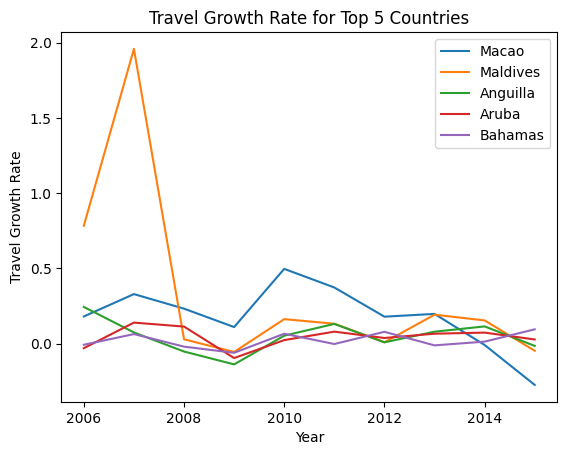

In [340]:
# lets visualize the growth rate for each country for the travel export, for the top 5 countries with the highest travel RCA

import matplotlib.pyplot as plt

# we know this from the output file EDA, these countries are competitors in the travel export market
best_travel_countries = ['Macao', 'Maldives', 'Anguilla', 'Aruba', 'Bahamas']

# filter the data for these countries
travel_data = input[input['Country'].isin(best_travel_countries)]

# plot the growth rate for each country
for country in best_travel_countries:
    country_data = travel_data[travel_data['Country'] == country]
    plt.plot(country_data['period'], country_data['Travel_growth_rate'], label=country)

plt.xlabel('Year')
plt.ylabel('Travel Growth Rate')
plt.title('Travel Growth Rate for Top 5 Countries')
plt.legend()

### Output: Travel Growth Rate

Lets find the share of each export category in a country's total exports over time, we can then check whether that country's export is concentrated on a specific category(s). We can then check if the dominating export value aligns with a high RCA value.

Lets use the 'Travel' category as an example again

In [ ]:
travel_share_list = []

# loop through each country group to calculate the travel share
for country, category in input.groupby('Country'):

    total_travel = category['Travel'].sum()
    total_exports = category.drop(['Country', 'period', 'TOTAL'], axis=1).sum().sum()
    
    travel_share = total_travel / total_exports
    travel_share_list.append({'Country': country, 'Travel_Share': travel_share})

# create a dataframe from the list
travel_share_df = pd.DataFrame(travel_share_list)

# these are the top 10 countries with the highest travel share, from the input data
travel_share_df.sort_values(by='Travel_Share', ascending=False).head(10)

/var/folders/vx/5tk112p12g31tcg7498x6wp00000gn/T/ipykernel_15030/2502571171.py:9: RuntimeWarning: invalid value encountered in scalar divide
  travel_share = total_travel / total_exports
/var/folders/vx/5tk112p12g31tcg7498x6wp00000gn/T/ipykernel_15030/2502571171.py:9: RuntimeWarning: invalid value encountered in scalar divide
  travel_share = total_travel / total_exports
/var/folders/vx/5tk112p12g31tcg7498x6wp00000gn/T/ipykernel_15030/2502571171.py:9: RuntimeWarning: invalid value encountered in scalar divide
  travel_share = total_travel / total_exports


,Country,Travel_Share
113,Macao,0.894569
118,Maldives,0.851583
5,Anguilla,0.757362
9,Aruba,0.748911
81,Grenada,0.694034
13,Bahamas,0.686660
161,Saint Lucia,0.678776
86,Haiti,0.659797
165,Sao Tome and Principe,0.617614
6,Antigua and Barbuda,0.596715


In [345]:
# these are the top 10 countries with the highest RCA for Travel, from the output data

output.groupby('Country')['Travel'].sum().sort_values(ascending=False).head(10)

Country
Macao                    192.823946
Maldives                 186.013664
Anguilla                 172.014787
Aruba                    168.360590
Bahamas                  154.029234
Saint Lucia              149.878585
Grenada                  145.227579
Antigua and Barbuda      131.410264
Barbados                 126.054241
Sao Tome and Principe    123.925302
Name: Travel, dtype: float64

<mark> We know from our previous analysis, just the export value for a category does not necessarily mean a high RCA value </mark>

<mark> This is obvious as it does not take into account the other export categories for that same country </mark>

<mark> We can see that for the most part, the export value ***share*** for travel aligns with the RCA value </mark>

<mark> Grenada, despite having a high share for travel export (5th in the world), its RCA value is not as high compared to its competitors (7th in the world) </mark>